## Sales Prediction using Python

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Loading and Exploration

In [5]:


# Load the dataset
df = pd.read_csv('Advertising.csv')

# Display the first few rows of the dataset and a summary of its statistics
df_head = df.head()
df_description = df.describe()

df_head, df_description


(   Unnamed: 0     TV  Radio  Newspaper  Sales
 0           1  230.1   37.8       69.2   22.1
 1           2   44.5   39.3       45.1   10.4
 2           3   17.2   45.9       69.3    9.3
 3           4  151.5   41.3       58.5   18.5
 4           5  180.8   10.8       58.4   12.9,
        Unnamed: 0          TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000  200.000000
 mean   100.500000  147.042500   23.264000   30.554000   14.022500
 std     57.879185   85.854236   14.846809   21.778621    5.217457
 min      1.000000    0.700000    0.000000    0.300000    1.600000
 25%     50.750000   74.375000    9.975000   12.750000   10.375000
 50%    100.500000  149.750000   22.900000   25.750000   12.900000
 75%    150.250000  218.825000   36.525000   45.100000   17.400000
 max    200.000000  296.400000   49.600000  114.000000   27.000000)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Data Preprocessing

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Checking for outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

missing_values, outliers


(Unnamed: 0    0
 TV            0
 Radio         0
 Newspaper     0
 Sales         0
 dtype: int64,
 Unnamed: 0    0
 TV            0
 Radio         0
 Newspaper     2
 Sales         0
 dtype: int64)

### Feature Selection

Examining the relationship between the advertising budgets (TV, Radio, Newspaper) and sales (Sales)

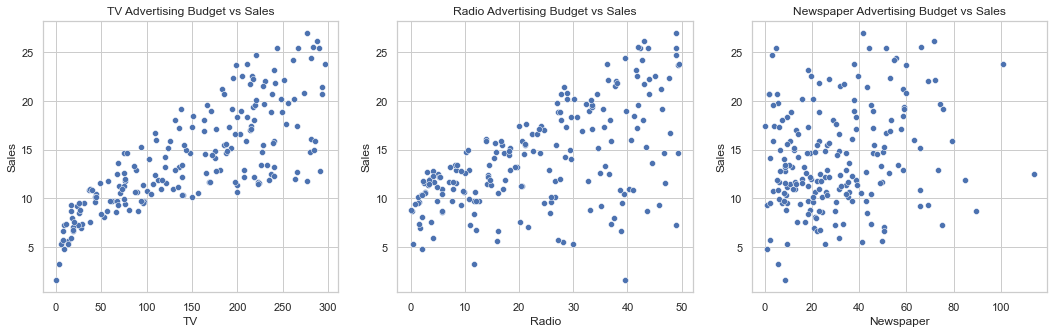

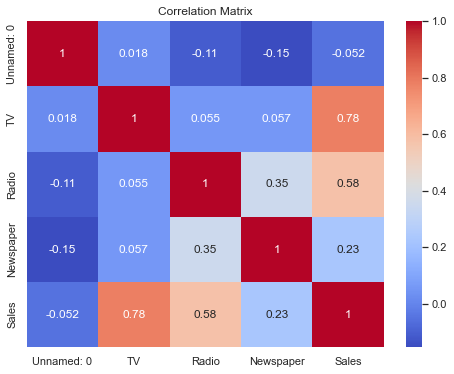

In [16]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Scatter plots for each advertising medium against sales
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising Budget vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising Budget vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising Budget vs Sales')

plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<p>The scatter plots and correlation matrix provide valuable insights into the relationship between advertising budgets and sales:</p>

<p>TV vs Sales: There appears to be a strong positive correlation between the TV advertising budget and sales. This suggests that higher TV advertising budgets are associated with higher sales.</p>
<p>Radio vs Sales: Radio advertising also shows a positive correlation with sales, though it seems less strong compared to TV.</p>
<p>Newspaper vs Sales: The relationship between newspaper advertising and sales is less clear and appears weaker compared to TV and Radio.</p>
<p>The correlation matrix quantitatively confirms these observations:</p>

<p>TV has a strong positive correlation (0.78) with Sales.</p>
<p>Radio shows a moderate positive correlation (0.58) with Sales.</p>
<p>Newspaper has a relatively weak correlation (0.23) with Sales.</p>
<p>Based on this analysis, TV and Radio advertising budgets are significant predictors of sales. While Newspaper has some correlation, its impact seems relatively lower.</p>

### Model Selection, prediction and evaluation


In [18]:
# Splitting the dataset into training and testing sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting sales for the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(3.1740973539761064, 0.8994380241009119)

<p>Mean Squared Error (MSE): The MSE for the model is approximately 3.17. This metric represents the average squared difference between the actual and predicted sales values. A lower MSE indicates better model performance.</p>
<p>R-squared (R²): The R² value is approximately 0.90. An R² value of 0.90 suggests that the model explains 90% of the variability in sales.</p>
<p>These metrics indicate that the model performs well in predicting sales based on the advertising budgets for TV, Radio, and Newspaper.</p>

### Prediction

In [19]:
# Coefficients of the model for each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Making specific predictions
# Example data: (TV: 150, Radio: 25, Newspaper: 20)
example_data = pd.DataFrame([[150, 25, 20]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = model.predict(example_data)

coefficients, predicted_sales[0]


(           Coefficient
 TV            0.044730
 Radio         0.189195
 Newspaper     0.002761,
 14.473593601116834)

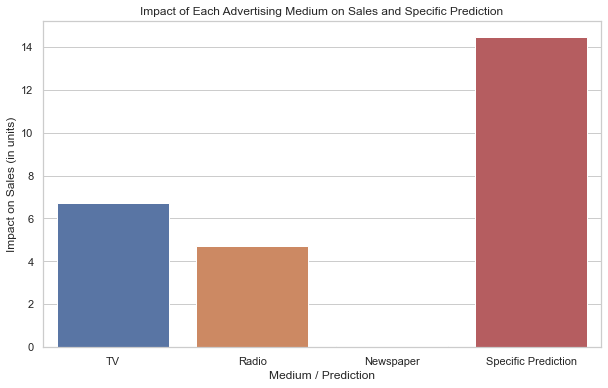

In [20]:
# Creating a dataframe for visualization
vis_data = pd.DataFrame({
    'Medium': ['TV', 'Radio', 'Newspaper', 'Specific Prediction'],
    'Budget': [150, 25, 20, 0],  # Budgets for TV, Radio, Newspaper, and 0 for the specific prediction
    'Impact on Sales': [coefficients.loc['TV', 'Coefficient'] * 150,
                        coefficients.loc['Radio', 'Coefficient'] * 25,
                        coefficients.loc['Newspaper', 'Coefficient'] * 20,
                        predicted_sales[0]]
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Medium', y='Impact on Sales', data=vis_data)
plt.title('Impact of Each Advertising Medium on Sales and Specific Prediction')
plt.ylabel('Impact on Sales (in units)')
plt.xlabel('Medium / Prediction')
plt.show()


<p>TV: The coefficient is approximately 0.0447. This means for every additional thousand dollars spent on TV advertising, sales increase by about 44.7 units.</p>
<p>Radio: The coefficient is approximately 0.1892. This implies for every additional thousand dollars spent on radio advertising, sales increase by about 189.2 units.</p>
<p>Newspaper: The coefficient is approximately 0.0028. This suggests a much smaller impact; for every additional thousand dollars spent on newspaper advertising, sales increase by only about 2.8 units.</p>
<p>These coefficients provide insights into the effectiveness of each advertising medium. TV and Radio have a more substantial impact on sales compared to Newspaper.</p>

<p>For the specific prediction, using the example data where the advertising budgets are 150 thousand dollars for TV, 25 thousand dollars for Radio, and 20 thousand dollars for Newspaper, the predicted sales are approximately 14.47 thousand units.</p>